<a href="https://colab.research.google.com/github/avigangarde/Capstone-II--Yes-bank-stock-close-price-prediction-Supervised-ML-Regression-/blob/main/Capstone_II_Yes_bank_stock_close_price_prediction(Supervised_ML_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Project Name**    - **Capstone II- Yes bank stock close price prediction(Supervised ML-Regression)** ##


##### **Project Type**    - Supervised ML-Regression
##### **Contribution**    - Individual
##### **Project by -** Avinash B Gangarde (Data science trainee at Almabetter)

# **Project Summary -**

This project is based Yes bank stock close price prediction .The objective of project is to predict the stock close price of Yes bank from the given data . Data given is from the period of July-2005 to Nov- 2020. Price of the stock has been inflated due to news and misconduct in the organisation. So we have predict  the stock price based on the given data.

 Yes bank is very well known in the Indian banking sector and has considerable amount of customers . Since 2018 , it has been in the news due to the fraud case involving the Rana Kapoor , who was a banker and managing director and CEO of  Yes bank. Owing to this fact , it was interesting to know how this impacted the company stock price and whether time series model or any other model can do justice to such situation. This dataset has the stock price since its inception and also including the closing , starting , highest and lowest stock price of every month. The main objective is to predict the closing  stock price of every month.


   In order to perform this task of predicting the closing stock price we are applying the linear regression model and try to see where it able to predict the closing stock price . Firstly we have to do the EDA of the dataset and clean the dataset and remove the null values and outliers. Then after that we have to do feature encoding if needed on the dataset. After the feature encoding we try to fit our  model on training and testing dataset and see the measuring parameters after that we will do hyper parameter tunning and trying to find out best fit hyper parameter and also cross validation. Then after that we will do regulerization  to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.


   In lastly we will do model explainability. Explainability in machine learning means that you can explain what happens in your model from input to output. Last and most important part is conclusion in which we conclude the learning and outcomes of the project and the model .


**GitHub Link -**[avigangarde/capstone II -Yes bank stock close price prediction (supervised ML - Regression)](https://github.com/avigangarde/Capstone-II--Yes-bank-stock-close-price-prediction-Supervised-ML-Regression-/blob/main/Capstone_II_Yes_bank_stock_close_price_prediction(Supervised_ML_Regression).ipynb)

# **Problem Statement**


Due to news and involvement of Rana kapoor in the fraud case , stock price has inflated so much we have the predict the stock price and check whether the ML model able predict the stock. Main  objective is to predict closing stock price of the month.

#### **Define Your Business Objective?**

Yes bank is private bank and it has many stake holders , so its matter that the stocks they own and price of their stocks . It’s very necessary to them to know the stock they own and price of the stock. So they could make decisions about the selling  or keeping then stock and know how much the business is get affected by the inflation of  the stock price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





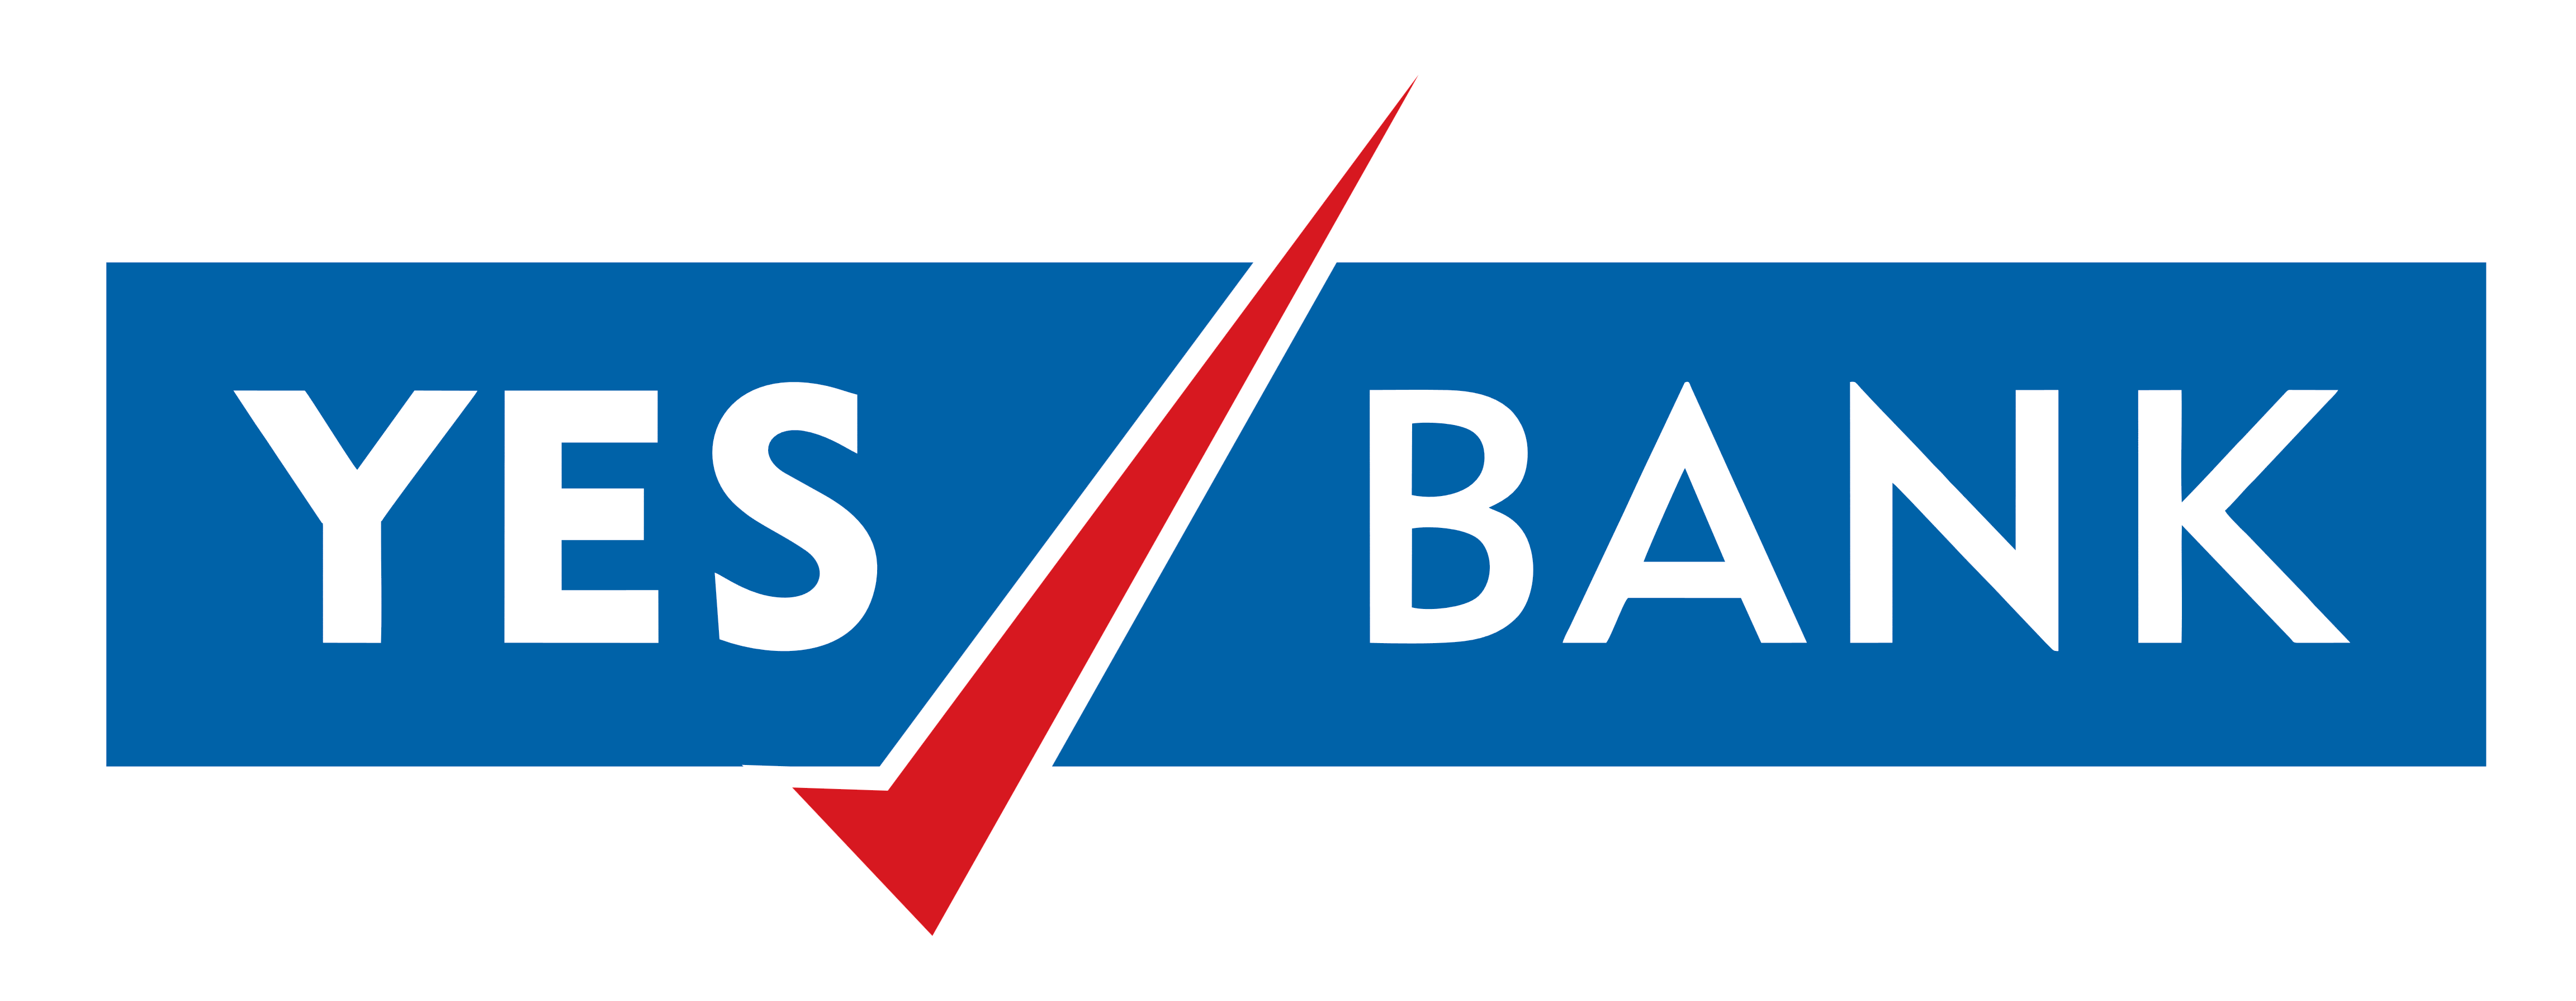

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# import library for data wrangling and data visualization
import pandas as pd
import numpy as np
from numpy import math
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Machine learning libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model  import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error , mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading of the dataset
df=pd.read_csv('/content/drive/MyDrive/ML capstone-II csv Files /data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.value_counts()

Date    Open    High    Low     Close 
Apr-06  20.56   20.80   18.02   19.49     1
May-11  61.26   61.68   54.50   60.07     1
Mar-17  290.60  311.57  283.60  309.82    1
Mar-18  320.70  325.80  285.10  304.90    1
Mar-19  234.60  281.30  228.80  275.05    1
                                         ..
Jan-09  15.28   18.34   11.48   12.24     1
Jan-10  53.60   57.58   46.42   49.84     1
Jan-11  62.98   63.54   49.39   52.59     1
Jan-12  47.92   66.50   46.11   65.99     1
Sep-20  14.30   15.34   12.75   13.15     1
Length: 185, dtype: int64

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

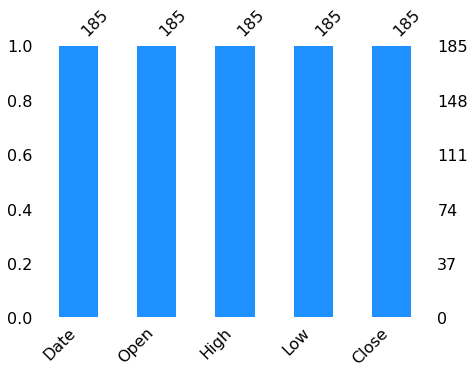

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df,figsize=(7,5),color='dodgerblue')

In [12]:
df.min()

Date     Apr-06
Open       10.0
High      11.24
Low        5.55
Close      9.98
dtype: object

In [13]:
df.max()

Date     Sep-20
Open     369.95
High      404.0
Low       345.5
Close     367.9
dtype: object

### What did you know about your dataset?

1] Dataset has 5 columns and 185 rows

2] Dataset has no null values 

3] Data set has include higest stock price of 404.0 Rs

4] Dataset has the lowest stock price of 5.0 Rs

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [15]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

* **Date:** It denotes date of investment done (in our case we have month and year).
* **Open:** Open means the price at which a stock started trading when the opening bell rang.
* **High:**  High refer to the maximum prices in a given time period.
* **Low:**  Low refer to the minimum prices in a given time period.
* **Close:** Close refers to the price of an individual stock when the stock exchange closed for the day.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# check the datatype of colunmns 
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

Here we can see that date is a object type of data , so we have to convert the date  columns into datetime format. 

In [18]:
# import datetime format
from datetime  import datetime
# here the data is of month-year format we have make it pertipuler formate of including the date of start of month to end of month
df['Date']=df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [19]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### What all manipulations have you done and insights you found?

Since data has no null values and missing values , there is not much to do with data , so have seen that the date columns has the object type of data ,so we have make sure every columns has perticuler type of dataset .

So we have changed the datatype of colums date to datetime format.

Insights found that :

1] Data has no missig values. 

2] Data has no null values.

3] One columns had the object type of datatype , that we coverted to datetime format.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [21]:
# Chart - 1 visualization code
from plotly.subplots import make_subplots
import plotly.graph_objects as go
hist=df.copy()
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1.add_trace(go.Candlestick(x=hist.index,
                              open=hist['Open'],
                              high=hist['High'],
                              low=hist['Low'],
                              close=hist['Close'],
                              name='Price'))
fig1.update_yaxes(range=[0,700000000],secondary_y=True)
fig1.update_yaxes(visible=False, secondary_y=True)
fig1.update_layout(xaxis_rangeslider_visible=False)  #hide range slider
fig1.update_layout(title={'text':'Stock Price of Yes bank from the Jul-2005 to Nov-2020', 'x':0.5})
fig1.show()




In [22]:
# ploting the candle stick chart for the stock price inflation of Yes bank
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(title={'text':'Stock Price of Yes bank from the Jul-2005 to Nov-2020', 'x':0.5})
fig.show()

In [23]:
df.iloc[40]

Date     2008-11-01 00:00:00
Open                   14.79
High                    17.8
Low                    11.25
Close                  12.26
Name: 40, dtype: object

In [24]:
df.iloc[97]

Date     2013-08-01 00:00:00
Open                    66.0
High                   67.81
Low                    43.22
Close                  48.65
Name: 97, dtype: object

In [25]:
df.iloc[184]

Date     2020-11-01 00:00:00
Open                   12.41
High                    14.9
Low                    12.21
Close                  14.67
Name: 184, dtype: object

##### 1. Why did you pick the specific chart?

Because,it commonly used to shows the stock price inflation in the stock market  .

##### 2. What is/are the insight(s) found from the chart?

1] Yes bank stock reached the highest closing price in August 2018.

stats :  August 2018

closing price: 343.4

2]  In Nov-2020 stock price  has fall down to lowest. 

stats: Nov 2020

closing price : 14.67

3] Stock price has seen execellent growth in market in the 2005 to 2018 after that suddden fall in share price in market .

4] After news breaking in the market price of share has significantly fall down and has effect on the business 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above insights shows the postive and negative growth of the Yes bank . definatly the huge money went to losses (Almost 400 cr were sanctioned to lender without norms) that incurred huge losses to Yes bank this reason behind the bank suffering losses. Yes bank might not able to regain there losses and hence fall down in the company losses after the 2018. 

#### Chart - 2

<function matplotlib.pyplot.show(*args, **kw)>

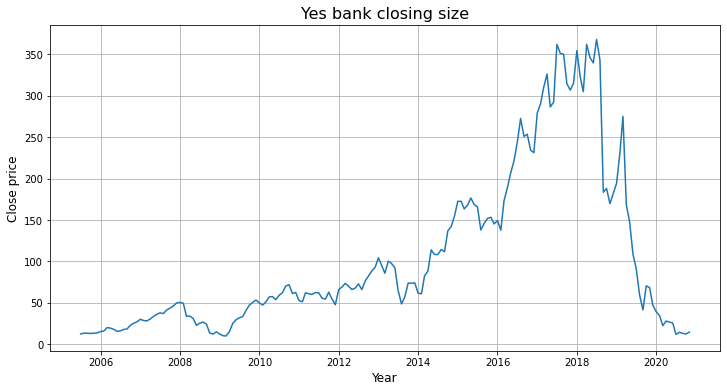

In [40]:
# Chart - 2 visualization code
# ploting close price vs date
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.plot(df['Date'],df['Close'])
plt.title('Yes bank closing size', fontsize=16)
plt.show


##### 1. Why did you pick the specific chart?

Above chart is line chart. we picked this chart to show the performance of the close stock price

##### 2. What is/are the insight(s) found from the chart?

1] After 2018 there is sudden fall in the graph.

2] We can see that stock has reached  close price where it was stared .

3] In 2018 stock price was at its highest value.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph shows the positive and negative growth of the Yes bank , upto 2018 the stock has risen continuesly . and there is fall in stock price has affected the business a lot.

#### Chart - 3

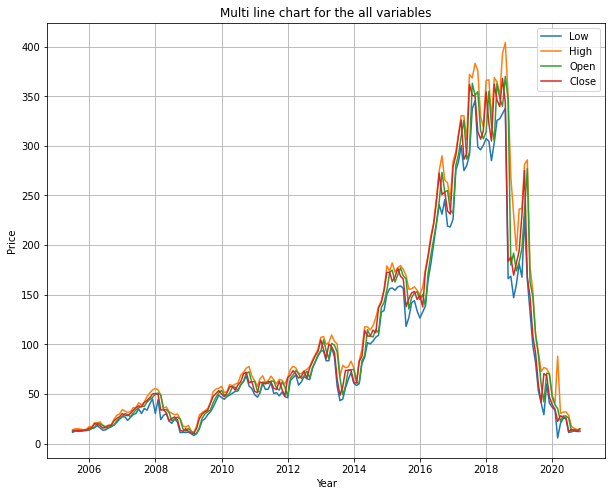

In [42]:
# Chart - 3 visualization code
#  Multi line chart comparing the all the variable in the data 
plt.figure(figsize=(10,8))
plt.plot(df['Date'],df['Low'])
plt.plot(df['Date'],df['High'])
plt.plot(df['Date'],df['Open'])
plt.plot(df['Date'],df['Close'])
plt.legend(['Low','High','Open','Close'])
plt.title('Multi line chart for the all variables')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

1] To compare the different varibale with the time period 
2] To Show the variation in the value of stock price 

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1] We do not see much inflation or variation amongs them. Stock has been seen significant growth and downfall in the shwon period.

2] we can has been impacted the significantly in just two years.

#### Chart - 4

In [44]:
# Chart - 4 visualization code
# So in the Given data we have independent variables and depenedent variables
# Stock close price is our dependent variables and rest of the  variables are independent variables .
# to make the list of independent  numerical variables 
numerical_features=list(set(df.describe().columns)-{'Close'})
numerical_features

['Open', 'Low', 'High']

In [55]:
# All columns containing the numerical values 
df.select_dtypes(include=np.number).columns.tolist()

['Open', 'High', 'Low', 'Close']

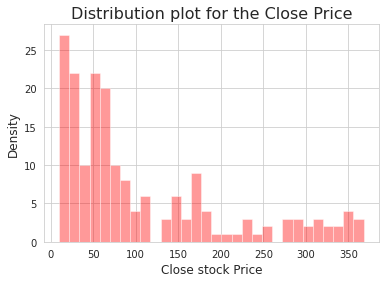

In [71]:
# To check the distribution 'close price' of the stock 
sns.set_style('whitegrid')
sns.distplot(df['Close'], kde = False, color ='red', bins = 30)
plt.title('Distribution plot for the Close Price', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

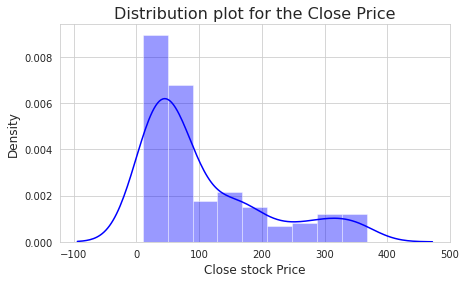

In [70]:
# plot the distribution of the close price of the stock
plt.figure(figsize=(7,4))
sns.distplot(df['Close'],color='blue')
plt.title('Distribution plot for the Close Price', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

1] To show the distribution of the graph . 

##### 2. What is/are the insight(s) found from the chart?

1] We found that the distribution of the stock close price is right skewed.

2] We have to make sure that it should be normally distributed to fit our model well .

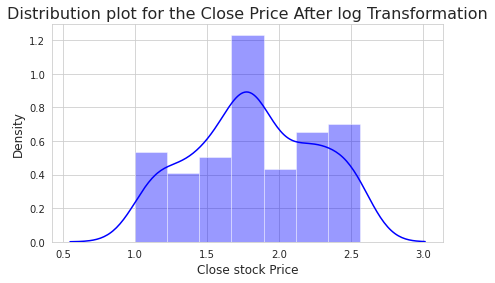

In [73]:
#  Apply the log normal distribution to make the the graph normal distribution.
plt.figure(figsize=(7,4))
sns.distplot(np.log10(df['Close']),color='Blue')
plt.title('Distribution plot for the Close Price After log Transformation', fontsize=16)
plt.xlabel('Close stock Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

#### 1] This is the distribution plot after applying the log distribution.

##**Lets see the distribution of value in the other features and plot the distribution of the feature and apply the lognormal distribution of needed .**

<function matplotlib.pyplot.show(*args, **kw)>

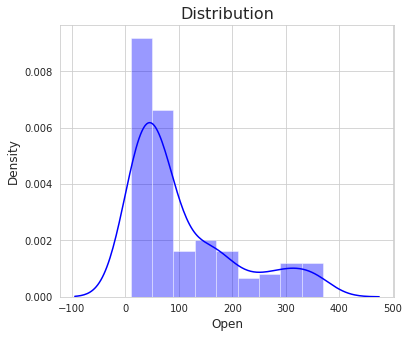

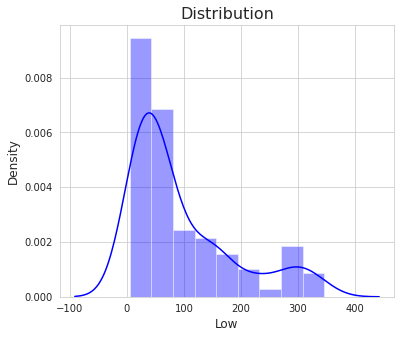

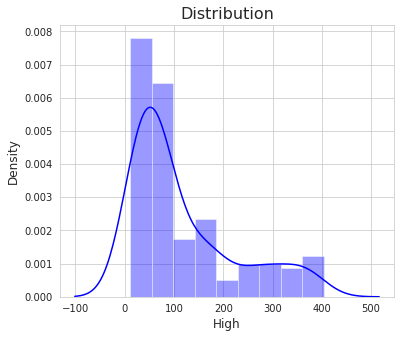

In [101]:
# Lets plot the distribution for the each variables.
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot((df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

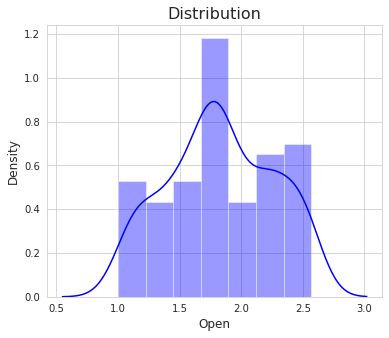

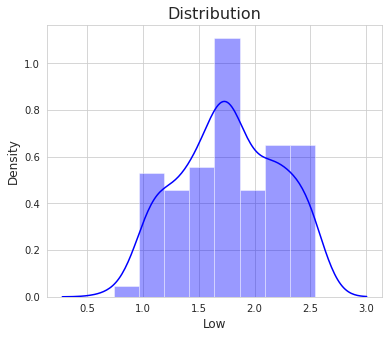

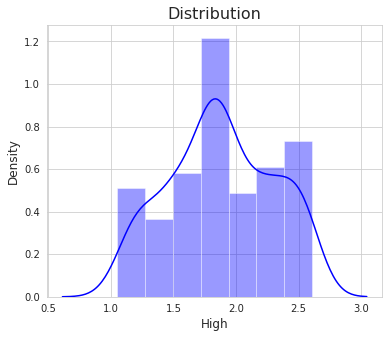

In [102]:
# After applying the log transformation 
for col in numerical_features:
    plt.figure(figsize=(6,5))
    sns.distplot(np.log10(df[col]), color='blue')
    plt.title("Distribution", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
plt.show

In [104]:
corr = df[numerical_features].corr()
corr

,Open,Low,High
Open,1.000000,0.983978,0.993040
Low,0.983978,1.000000,0.983422
High,0.993040,0.983422,1.000000


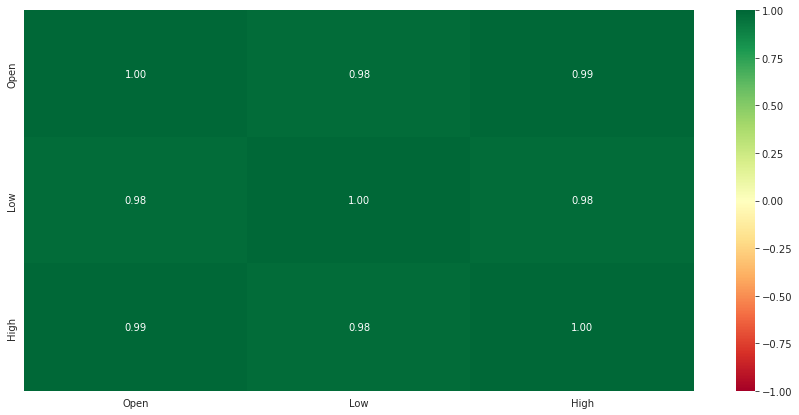

In [105]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn") # Spectral
plt.show()

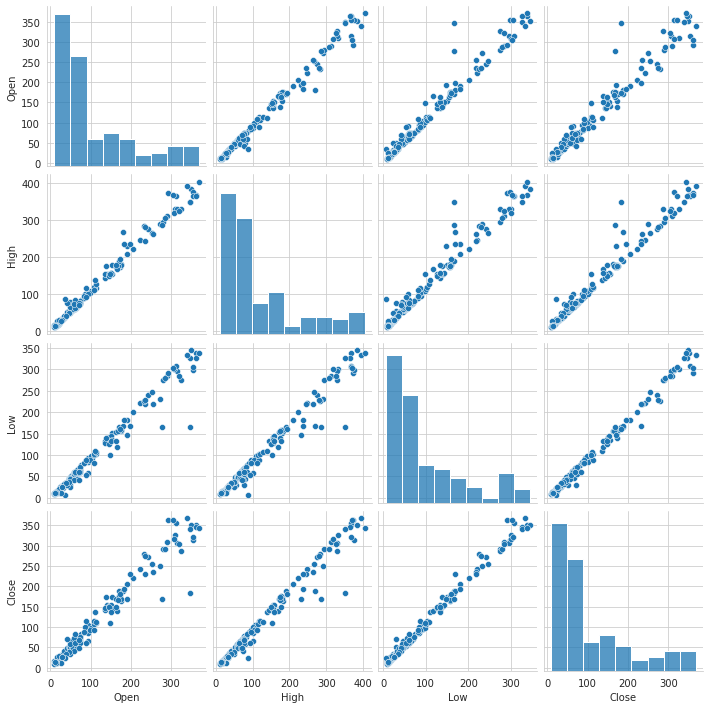

In [103]:
# lets plot the pairplot to plot pairwise relationships between variables within a dataset. 
sns.pairplot(df)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***